# Reviewing how to make a first app

In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *

## Setting up MS Azure account to search images

In [2]:
# Set Bing Image Search API key
key = os.environ.get('AZURE_SEARCH_KEY', '19988e4fd5fd48678e23804469191c68')
print(key)

19988e4fd5fd48678e23804469191c68


In [3]:
# Test the search engine
results = search_images_bing(key, 'venomous snake')
img = results.attrgot('content_url')

C:\Users\eriks\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


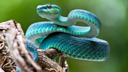

In [4]:
dest = 'venomous_snake.jpg'
download_url(img[0], dest, overwrite=True)
im = Image.open(dest)
im.to_thumb(128, 128)

## Download pictures of venomou and nonvenomous snakes

In [4]:
snake_types = ['bothrops', 'crotalus', 'micrurus', 'chironius', 'apostolepis', 'boidae']
path = Path('snakes')

In [6]:
if not path.exists():
    path.mkdir()
    for snk in snake_types:
        dest = (path/snk)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{snk}')
        download_images(dest, urls=results.attrgot('content_url'))

In [7]:
file_names = get_image_files(path)
failed = verify_images(file_names)

In [8]:
#failed.map(Path.unlink);

In [5]:
snakes = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=666),
                   get_y=parent_label,
                   item_tfms=RandomResizedCrop(224, min_scale=0.5),
                   batch_tfms=aug_transforms())

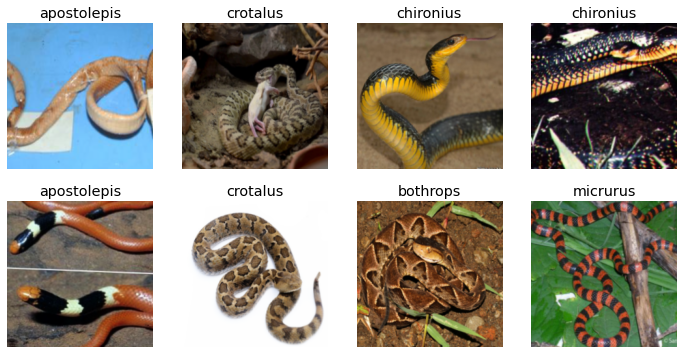

In [6]:
snake_dl = snakes.dataloaders(path, num_workers=0)
snake_dl.train.show_batch(max_n=8, nrows=2)

In [8]:
snake_learn = cnn_learner(snake_dl, resnet18, metrics=error_rate)
snake_learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,2.218934,0.890073,0.276074,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.964899,0.766181,0.226994,00:22
1,0.790792,0.702784,0.233129,00:23
2,0.624539,0.650275,0.202454,00:22
3,0.525300,0.614006,0.184049,00:26
4,0.445138,0.603208,0.184049,00:21
5,0.375956,0.614029,0.190184,00:25
6,0.328004,0.615928,0.184049,00:24


In [40]:
snake_interpret = ClassificationInterpretation.from_learner(snake_learn)

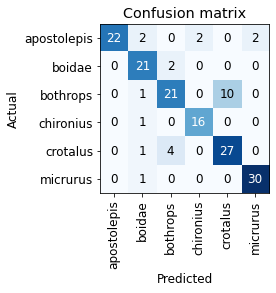

In [41]:
snake_interpret.plot_confusion_matrix()

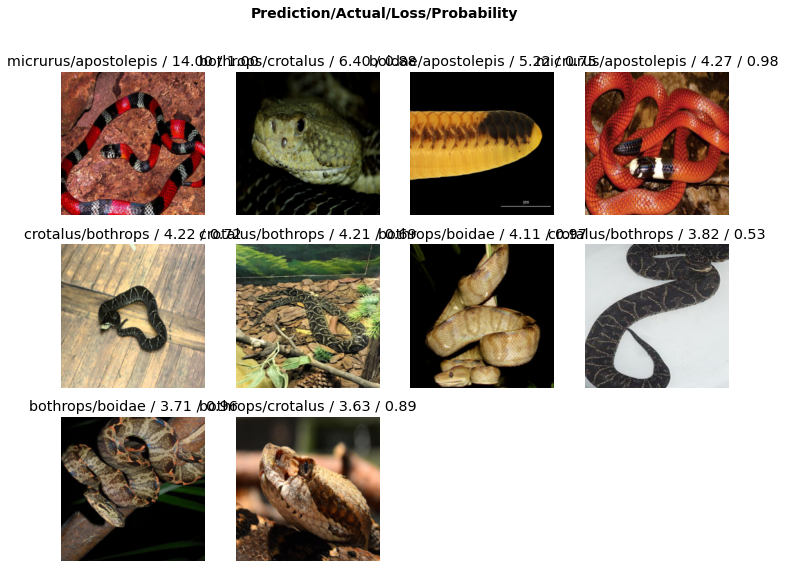

In [42]:
snake_interpret.plot_top_losses(10)

In [43]:
#cleaner = ImageClassifierCleaner(snake_learn)
#cleaner

In [44]:
snake_learn.export(fname='snakes.pkl')